In [1]:
import numpy as np
import pandas as pd

'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [30]:
df = pd.read_csv('Iris.csv')

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df = df.iloc[:,1:] ## dropping ID column

In [33]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
## Converting Species column(o/p) to numbers using label encoding

from sklearn.preprocessing import LabelEncoder

In [35]:
encoder = LabelEncoder()

In [36]:
df['Species'] = encoder.fit_transform(df['Species']) 

#### To make the problem difficult, we are removing setosa data and also 2 columns

In [37]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [38]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

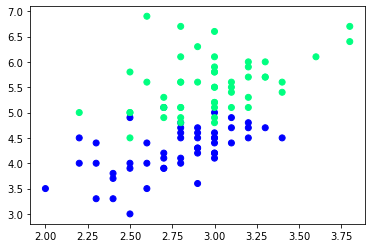

In [40]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [43]:
#### Shuffling the data using sample() method to train the models
### Taking only 10 rows for training
df = df.sample(100) ## shuffling the dataset
df_train = df.iloc[:60,:].sample(10) ## picking first 60 rows and shuffling them again to pick 10 random rows into a new df
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [54]:
df_train.shape

(10, 3)

In [45]:
df_val

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
87,2.3,4.4,1
102,3.0,5.9,2
112,3.0,5.5,2
70,3.2,4.8,1


In [46]:
df_test

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
68,2.2,4.5,1
51,3.2,4.5,1
140,3.1,5.6,2
113,2.5,5.0,2


In [52]:
X_test = df_val.iloc[:,0:2].values
X_test

array([[2.7, 5.1],
       [2.3, 4.4],
       [3. , 5.9],
       [3. , 5.5],
       [3.2, 4.8]])

In [50]:
y_test = df_val.iloc[:,-1].values
y_test

array([1, 1, 2, 2, 1])

### Case-1 Bagging

We will train 3 Decision Trees

In [56]:
### Data for Tree 1 is 10 random rows picked from dataset and stored in df_train
### We are about to train 3 DT's and we will be providing 80% of the total data to each DT.

df_bag = df_train.sample(8,replace=True) ### We can have same rows repeating while using replace=True which is a rare case.
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
146,2.5,5.0,2
82,2.7,3.9,1
103,2.9,5.6,2
61,3.0,4.2,1
67,2.7,4.1,1
105,3.0,6.6,2
67,2.7,4.1,1


#### We can see that 146 is repeated twice because we have used replace = True

In [58]:
pip install mlxtend

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\balak\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\balak\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\balak\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\balak\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\balak\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\balak\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\balak\anaconda3\lib\site-packages


   ---------------------------------------- 1.4/1.4 MB 4.7 MB/s eta 0:00:00


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree ## This is to plot the tree
from mlxtend.plotting import plot_decision_regions ## This is to plot decision boundaries
from sklearn.metrics import accuracy_score

In [61]:
dt_bag1 = DecisionTreeClassifier()

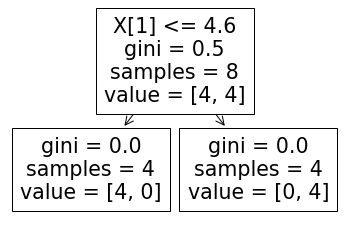

C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


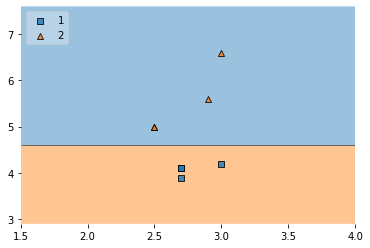

In [63]:
evaluate(dt_bag1,X,y)

In [62]:
### Evaluate function 
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values,clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

#### Repeat the same process for DT2. Create data for DT2, pass 80% of that to classifier and test on test data.

In [64]:
### Data for Tree 2
df_bag = df_train.sample(8,replace=True)

## Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

## print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
67,2.7,4.1,1
67,2.7,4.1,1
114,2.8,5.1,2
100,3.3,6.0,2
105,3.0,6.6,2
130,2.8,6.1,2
82,2.7,3.9,1
100,3.3,6.0,2


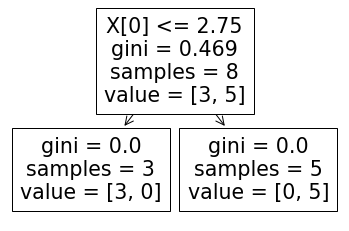

C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


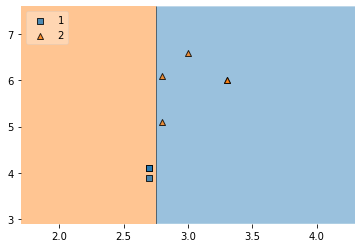

In [65]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

#### Same thing for 3rd DT

In [66]:
### Data for Tree 3
dt_bag = df_train.sample(8,replace=True)

## Fetch X and y
X = dt_bag.iloc[:,0:2]
y = dt_bag.iloc[:,-1]

## Print dt_bag
dt_bag

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
100,3.3,6.0,2
146,2.5,5.0,2
130,2.8,6.1,2
75,3.0,4.4,1
103,2.9,5.6,2
75,3.0,4.4,1
114,2.8,5.1,2


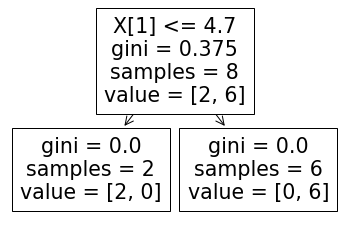

C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


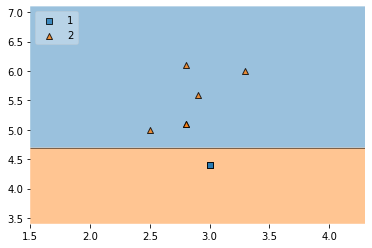

In [67]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

#### Till above, we have completed the bootstrapping part. Now, we move on to the aggregation part of it.

### Predcition 

In [69]:
df_test.shape

(5, 3)

In [70]:
df_test

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
68,2.2,4.5,1
51,3.2,4.5,1
140,3.1,5.6,2
113,2.5,5.0,2


In [72]:
#### Now, let us pass the 1st point(3.0,6.1) to the 3 models to perform the prediction on the point.
### We will pass the same point to all 3 models which we trained individually.

print('Predictor 1',dt_bag1.predict(np.array([3.0,6.1]).reshape(1,2)))
print('Predictor 2',dt_bag2.predict(np.array([3.0,6.1]).reshape(1,2)))
print('Predictor 3',dt_bag3.predict(np.array([3.0,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\balak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### All 3 models are predicting output as 2. Hence, output will be 2

#### Until now, we did row sampling. We can also perform Column sampling i.e., pass  few columns for one model and other few columns to other model 

#### Column sampling is useful during high dimensional data. This is called Random Sub spaces

In [74]:
 ### To perform column sampling:
    
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [76]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,117,6.5,3.0,5.5,1.8,Iris-virginica
21,22,5.1,3.7,1.5,0.4,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
64,65,5.6,2.9,3.6,1.3,Iris-versicolor


In [77]:
## Column sample with replacement

df1.sample(2,replace=True,axis=1)

,Species,PetalLengthCm
116,Iris-virginica,5.5
21,Iris-setosa,1.5
22,Iris-setosa,1.0
30,Iris-setosa,1.6
25,Iris-setosa,1.6
44,Iris-setosa,1.9
41,Iris-setosa,1.3
55,Iris-versicolor,4.5
79,Iris-versicolor,3.5
64,Iris-versicolor,3.6


#### Random Patches

Here, we use both row and column sampling.    

In [80]:
df.sample(8,replace=True).sample(2,replace=True,axis=1) ### Here, we are performing both row and column sampling

,SepalWidthCm,SepalWidthCm
96,2.9,2.9
57,2.4,2.4
126,2.8,2.8
115,3.2,3.2
95,3.0,3.0
66,3.0,3.0
124,3.3,3.3
129,3.0,3.0


### BAGGING CLASSIFIER(USING SKLEARN):

In [82]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [83]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Training the DT model alone

In [86]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy:", accuracy_score(y_test,y_pred))

Decision Tree accuracy: 0.862


#### Training using Bagging method

In [87]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25, ### Using 25% of training data set in each sample
    bootstrap=True, ## Sampling with replacement
    random_state=42
)

In [88]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [89]:
y_pred = bag.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred)

0.917

In [92]:
bag.estimators_samples_

[array([2523, 3113, 7114, ..., 4291, 4472, 3620]),
 array([4782,  663, 7155, ..., 5963,  495, 1767]),
 array([5462, 6574, 4896, ..., 3979, 7827,   37]),
 array([2848, 2629, 1591, ..., 7723, 1314, 1565]),
 array([3821, 6494, 1606, ..., 5686, 7870, 2558]),
 array([2261, 7922, 3649, ..., 4478, 6286, 6943]),
 array([ 652, 1676, 2291, ..., 2723, 7007, 6344]),
 array([2478, 4107, 1958, ..., 7979, 5695, 7854]),
 array([5800, 3548, 6540, ..., 3899,  831,   55]),
 array([5256, 7181, 3409, ..., 5286, 7535, 1335]),
 array([2675, 2834, 3817, ..., 1726, 2323, 7642]),
 array([3236, 7607, 4600, ...,  445, 7501, 6604]),
 array([4563, 4137, 6298, ..., 6611, 3023, 5529]),
 array([2816, 5343, 5817, ..., 3197, 2917, 5775]),
 array([2448, 2733, 5480, ...,  747, 5842,   69]),
 array([4248, 3828, 4630, ..., 1284, 2542, 3370]),
 array([4815, 1867,  503, ..., 4692, 7952, 4855]),
 array([1688, 4132, 5218, ..., 2491, 1876,  471]),
 array([4167, 2900, 3602, ..., 2974, 5705, 1466]),
 array([2920, 7645, 5452, ..., 

#### ABove list gives information about what data each base learner recieved as part of sampling process. All these are the row numbers in the data set 

In [93]:
bag.estimators_samples_[0].shape ### 2000 because max_samples is set to 25% of training dataset size

(2000,)

In [94]:
X_train[2523]

array([ 0.82239294, -0.71858126, -1.06214022, -1.53715319,  0.11146871,
        0.66020206, -0.40079747, -0.93824498,  1.23307524,  0.53881686])

In [96]:
df = pd.DataFrame(X_train)

In [97]:
df

,0,1,2,3,4,5,6,7,8,9
0,1.348792,1.144156,-1.089312,-1.048828,0.864802,1.354916,-1.111893,-1.105773,1.498006,0.472953
1,3.761109,-0.746156,0.432150,-0.436128,-0.762703,3.199744,0.810951,2.085920,-0.965857,0.650364
2,2.840706,-2.159429,-2.925219,0.515960,-1.159204,1.376529,0.109981,-1.028613,2.249755,0.070274
3,-0.494669,0.990802,1.696627,-0.591880,-0.463119,0.038435,-0.764574,1.273868,-1.597810,-0.106660
4,-1.031785,-0.444085,2.641760,-0.788852,-0.289233,1.211283,-0.077779,-0.069298,-0.861230,-0.715281
...,...,...,...,...,...,...,...,...,...,...
7995,1.409278,-0.836216,-2.155560,0.182751,-0.675857,0.010308,-0.614172,-0.441083,1.241189,2.469244
7996,-1.119129,0.847617,4.572742,0.684178,1.094922,2.131591,-0.838648,0.907623,-2.182552,-1.641224
7997,1.850627,-0.816992,-0.082264,0.241638,2.031891,1.030927,0.036666,1.426149,-0.727502,2.054109
7998,1.250868,-0.293355,0.626363,1.138543,0.807886,3.699396,-0.285493,-2.432418,2.122328,0.828250


#### To check number of columns used as part of column sampling, we can use estimators_features_

In [ ]:
bag.estimators_features_

#### Bagging using SVM

In [99]:
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [100]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM", accuracy_score(y_test,y_pred))

Bagging using SVM 0.9125


#### Pasting

In [103]:
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    random_state=42,
    verbose=1, ### Gives info during what is happening during the training time
    n_jobs = -1 ### Divides the task among the CPU cores present which makes it faster for execution
)

In [104]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM", accuracy_score(y_test,y_pred))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   26.2s remaining:   26.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   26.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Bagging using SVM 0.9125


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   56.1s remaining:   56.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   56.2s finished


In [105]:
### Random Subspaces where we perform column sampling

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0, ## taking all samples
    bootstrap=False,
    max_features=0.5, ## using only 5 out of 10 columns
    bootstrap_features=True,
    random_state=42
)




In [106]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random  Subspaces classifier:", accuracy_score(y_test,y_pred))

Random  Subspaces classifier: 0.9075


#### Random Patches

In [107]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [108]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random  Patches classifier:", accuracy_score(y_test,y_pred))

Random  Patches classifier: 0.91


#### OOB(Out of bag samples)

OOB --> When we do rpow sampling, there are few rows which are repeated in the samples. But on the other hand, there might be rows, which end up not being in any of the samples when we are using "With Replacement". 

As per statistical study, only 63% of the rows will appear in the samples while remaining 37% will not appear. These 37% are called OOB.

So, this is kind of unseen data. We can use this unseen data to check the accuracy of our model or how our model is performing.

This can be done using the parameter "oob_score = True"

In [109]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [110]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [111]:
bag.oob_score_   ### This will be close to accuracy of the model

0.90275

In [116]:
y_pred = bag.predict(X_test)
accuracy_score(y_test,y_pred)

0.917